## Define Library and Function

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(green_screen, background, size):
    g_img = cv2.resize(cv2.imread(green_screen), size)
    bg = cv2.resize(cv2.imread(background), size)
    return g_img, bg

def image_green_screen(upper, lower, green_screen, background):
    mask = cv2.inRange(green_screen, lower, upper)
    res = cv2.bitwise_and(green_screen, green_screen, mask = mask)
    f = g_img - res
    img = np.where(f == 0, bg, f)
    img_res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_res

def visualize(image_list, title_list):
    plt.figure(figsize = (12,12))
    for i in range(len(image_list)):
        plt.subplot(1,3,i+1)
        plt.imshow(image_list[i])
        plt.title(title_list[i])
        plt.xticks([]),plt.yticks([])

## Call Function

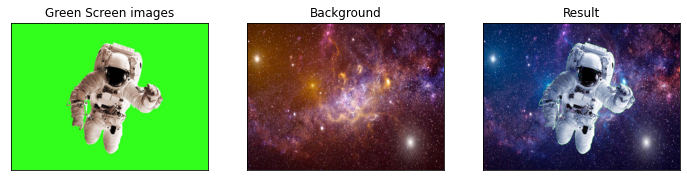

In [38]:
g_img, bg = load_image('green.jpg', 'bg.jpg', (640, 480))

u_green = np.array([100, 255, 93])
l_green = np.array([1,50,15])

images = image_green_screen(u_green, l_green, g_img, bg)

visualize_img = [g_img, bg, images]
visualize_title = ['Green Screen images', 'Background', 'Result']

visualize(visualize_img, visualize_title)